# Exploratory Data Analysis (EDA) on Nobel Prizes (1901-2016) Dataset


In [206]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [207]:
nobeldata = pd.read_csv('/Users/elifcici/Desktop/Nobel Prize Dataset_1901_2016.csv')
nobeldata.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [208]:
nobeldata.tail()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
968,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,930,Individual,J. Michael Kosterlitz,1943-06-22,Aberdeen,United Kingdom,Male,Brown University,"Providence, RI",United States of America,NaN,NaN,NaN


In [209]:
nd = nobeldata.copy()

In [210]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [211]:
nd.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,969.0,1970.287926,32.937498,1901.0,1947.0,1976.0,1999.0,2016.0
Laureate ID,969.0,470.152735,274.586623,1.0,230.0,462.0,718.0,937.0


In [212]:
print(f"Any duplicates? {nd.duplicated().values.any()}")

Any duplicates? False


In [213]:
nd.isna().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

<span style="font-weight:bold; color:black; font-size:18 px; "> When analysing the dataset overall, it is observed that it contains NULL values in different categories and to a significant extent. Since removing data with NULL values for data manipulation would lead to serious data loss and incorrect results, the dataset has been analyzed by keeping data with NULL values except where necessary. In addition, when analyzing data types, all data except the year they received the award and award_ids are stored in object type. When object type data is anaylzed in depth, data types were not changed due to their contents, except for death and birth dates. Death and birth dates, on the other hand, have been arranged under the questions by changing their data types in line with the requested outputs.

In [214]:
birth_countries_nan = nd[nd['Birth Country'].isna()]
display(birth_countries_nan)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
filtered_nd = nd.dropna(subset=['Birth Country'])
filtered_nd.isna().sum()

Year                      0
Category                  0
Prize                     0
Motivation               72
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       221
Organization City       227
Organization Country    227
Death Date              326
Death City              344
Death Country           338
dtype: int64

<span style="font-weight:bold; color:black; font-size:18 px; "> All values with birth country and gender as NaN represent organizations that have won awards in the peace category. Since these data cannot be worked on in line with the questions and will not have an effect on the outputs to be obtained, the relevant data have been removed from the list in order to clean the datase.

# 1.QUESTION
<span style="font-weight:bold; color:black; font-size:18 px; "> Find the top ten countries with the most Nobel Prize winners.


In [216]:
most_winner_country_top10 = filtered_nd['Birth Country'].value_counts().to_frame().head(10)
print(most_winner_country_top10)

                          count
Birth Country                  
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18


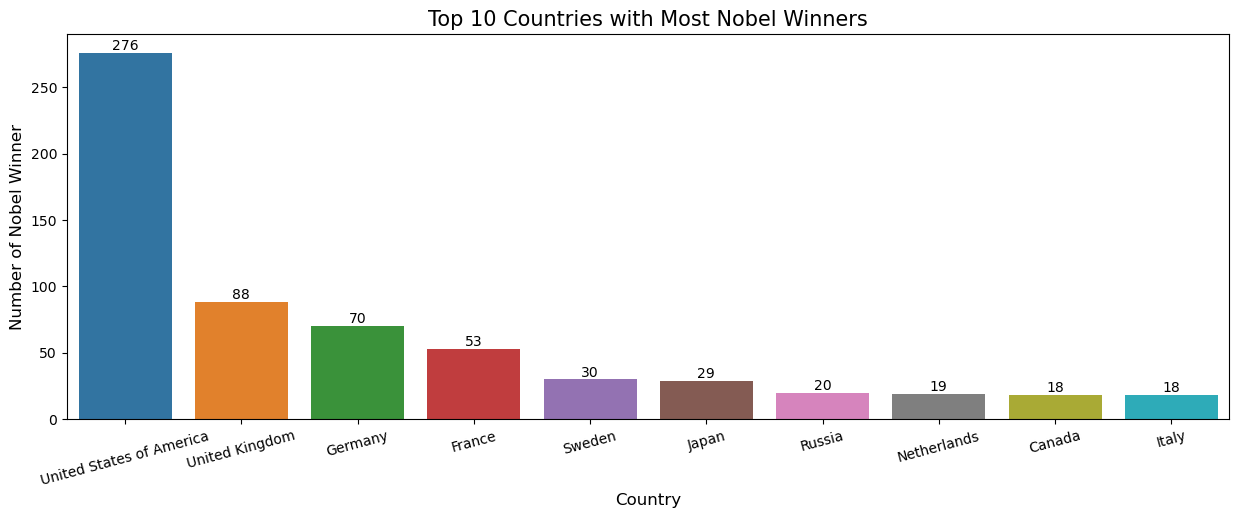

In [217]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=most_winner_country_top10.index, y='count', data=most_winner_country_top10)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Nobel Winner', fontsize=12)
plt.title('Top 10 Countries with Most Nobel Winners', fontsize=15)
plt.xticks(rotation=15)
plt.show()

<span style="font-weight:bold; color:black; font-size:18 px; ">  When analyzing the Nobel Prizes organized in different categories between 1901 and 2016, the total awards received throughout this process have been calculated based on the birth countries of the award winners. While the United States of America (USA) is the country that has won the most awards by a wide margin; 6 European countries, including England, Germany, and France, make up the majority of the top 10 countries. Apart from European countries, it is observed that Japan, Canada, and Russia have secured places on the list with over 15 awards each.

# 2.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> List the first women to win the Nobel Prize.

In [218]:
female_winner = filtered_nd[filtered_nd.Sex=='Female'].sort_values('Year', ascending=True)
female_winner = female_winner.drop_duplicates (subset= "Full Name", keep = "first")
print('First Female Winner')
display(female_winner[['Full Name', 'Year']])

First Female Winner


,Full Name,Year
19,"Marie Curie, née Sklodowska",1903
29,"Baroness Bertha Sophie Felicita von Suttner, n...",1905
52,Selma Ottilia Lovisa Lagerlöf,1909
129,Grazia Deledda,1926
142,Sigrid Undset,1928
163,Jane Addams,1931
183,Irène Joliot-Curie,1935
204,Pearl Buck,1938
225,Gabriela Mistral,1945
236,Emily Greene Balch,1946


In [219]:
total_female_winners = len(female_winner)
print("Total number of first prize female winners:", total_female_winners)

Total number of first prize female winners: 48


<span style="font-weight:bold; color:black; font-size:18 px; "> The first winner women between 1901 and 2016 were listed by considering the year, they received their first award uniquely (due to some individuals receiving multiple awards) and sorting by years (this value was used as there are no NULL values in the award years and no data loss would occur). Marie Curie became the first woman to receive a Nobel Prize by winning an award for the first time in 1903. It is observed that a total of 48 women won their first award between the relevant years. While this number is observed to be quite low compared to the total number of awards, it is possible to clearly mention the dominance of male winners in the Nobel Prizes. It can be said that with the 2000s, the number of women winning per year has increased slightly, although still very low. For example, 5 women in 2009 and 3 women in 2011 won their first Nobel Prize. However, the dominance of the number of men is still observed with a wide margin.

# 3.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> List the first men to win the Nobel Prize.

In [220]:
male_winner = filtered_nd[filtered_nd.Sex=='Male'].sort_values('Year', ascending=True)
male_winner = male_winner.drop_duplicates (subset= "Full Name", keep = "first")
print('First Male Winner')
display(male_winner[['Full Name', 'Year']])

First Male Winner


,Full Name,Year
0,Jacobus Henricus van 't Hoff,1901
1,Sully Prudhomme,1901
2,Emil Adolf von Behring,1901
3,Jean Henry Dunant,1901
4,Frédéric Passy,1901
...,...,...
960,Bernard L. Feringa,2016
959,Sir J. Fraser Stoddart,2016
958,Jean-Pierre Sauvage,2016
962,Bengt Holmström,2016


In [221]:
total_male_winners = len(male_winner)
print("Total number of first prize male winners:", total_male_winners)

Total number of first prize male winners: 833


<span style="font-weight:bold; color:black; font-size:18 px; "> The first winner men between 1901 and 2016 were listed by considering the year, they received their first award uniquely (due to some individuals receiving multiple awards) and sorting by years (this value was used as there are no NULL values in the award years and no data loss would occur). Jacobus Henricus van't Hoff became the first man to receive a Nobel Prize by winning an award for the first time in 1901. It is observed that a total of 833 men won their first award between the relevant years. While this number is observed to be quite high compared to the total number of awards, it is possible to clearly mention the dominance of male winners in the Nobel Prizes.

# 4.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> Visualize the country that has won the most Nobel Prizes since which year it has dominated, and what are the factors that play a role in this dominance?

In [222]:
nd_decade = filtered_nd.copy()

In [223]:
total_award_counts = nd_decade['Birth Country'].value_counts().sum()
print(f"Total Award Number: {total_award_counts}")

Total Award Number: 943


In [224]:
top_country_awards = nd_decade['Birth Country'].value_counts().to_frame()
top_country = top_country_awards.idxmax().values[0]
top_country_count = top_country_awards.max().values[0]
print("Top Country with the most awards:",
      top_country, "- Award Count:", top_country_count)

Top Country with the most awards: United States of America - Award Count: 276


In [225]:
nd_decade['Decade'] = (nd_decade['Year'] // 10) * 10
award_counts_by_decade = nd_decade.groupby('Decade')['Year'].count().reset_index()
award_counts_by_decade.columns = ['Decade', 'award_count']
display("USA Award Distribution by Year", award_counts_by_decade)

'USA Award Distribution by Year'

,Decade,award_count
0,1900,57
1,1910,38
2,1920,54
3,1930,61
4,1940,42
5,1950,78
6,1960,76
7,1970,106
8,1980,96
9,1990,104


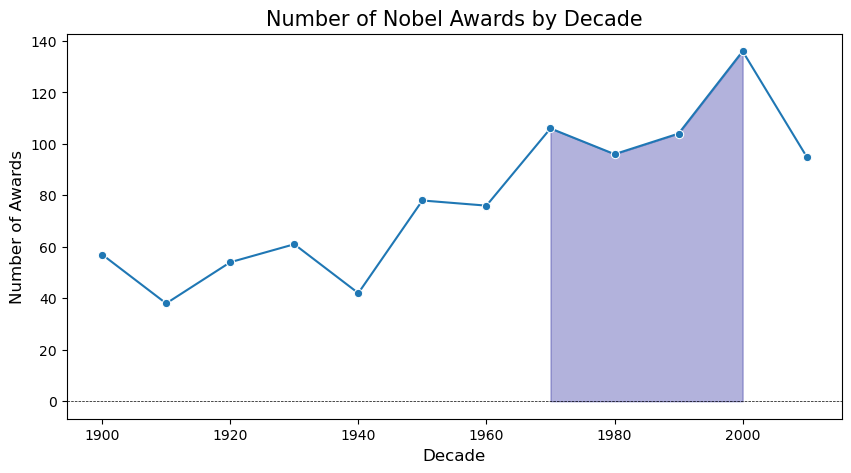

In [226]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Decade', y='award_count', data=award_counts_by_decade, marker='o')
plt.xlabel('Decade', fontsize=12)
plt.fill_between(award_counts_by_decade['Decade'], award_counts_by_decade['award_count'], 
                 where=((award_counts_by_decade['Decade'] >= 1970) & (award_counts_by_decade['Decade'] <= 2000)), 
                 color='darkblue', alpha=0.3)
plt.ylabel('Number of Awards', fontsize=12)
plt.title('Number of Nobel Awards by Decade', fontsize=15)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.show()

<span style="font-weight:bold; color:black; font-size:18 px; "> Between 1901 and 2016, the United States of America (USA) won the most Nobel Prizes with 259 awards. Calculating the number of awards won by the USA every 10 years:
The USA's dominance began in the 1950s with a steady increase in awards. In the 1970s, it surpassed 100 awards with 104 prizes. The 1980s saw a slight decrease to 97 awards, but the 1990s rebounded to 104. The 2000s became the most successful period with 123 awards, nearly half of the total won.   

Analyzing the reasons for USA's dominance in Nobel Prizes:
* During the Cold War, in a bipolar world, the USA allocated significant budgets to scientific research in various Nobel Prize categories to compete with the Soviet Union.
* A gradual increase in USA's award count is clearly observed in the competitive environment of the post-World War II bipolar world.
* As the Soviet Union and Eastern Bloc weakened in the 1970s and 1980s, culminating in the dissolution of the USSR in 1991, the USA gained sole success in Nobel Prizes worldwide.
* The peak in the 2000s can be attributed to this development.

# 5.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> Visualize the gender, age, award category and years of Nobel Prize winners. (Show a separate graph for each award category) Interpret the visual according to the results.

In [227]:
nd_category = filtered_nd.copy()
nd_category.isna().sum()

Year                      0
Category                  0
Prize                     0
Motivation               72
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       221
Organization City       227
Organization Country    227
Death Date              326
Death City              344
Death Country           338
dtype: int64

In [229]:
null_birth_dates = nd_category[nd_category['Birth Date'].isnull()]
print(null_birth_dates)

     Year   Category                              Prize  \
853  2009  Chemistry  The Nobel Prize in Chemistry 2009   
894  2011    Physics    The Nobel Prize in Physics 2011   
895  2011    Physics    The Nobel Prize in Physics 2011   

                                            Motivation Prize Share  \
853  "for studies of the structure and function of ...         1/3   
894  "for the discovery of the accelerating expansi...         1/2   
895  "for the discovery of the accelerating expansi...         1/2   

     Laureate ID Laureate Type                 Full Name Birth Date  \
853          841    Individual  Venkatraman Ramakrishnan        NaN   
894          864    Individual           Saul Perlmutter        NaN   
895          864    Individual           Saul Perlmutter        NaN   

                  Birth City             Birth Country   Sex  \
853  Chidambaram, Tamil Nadu                     India  Male   
894     Champaign-Urbana, IL  United States of America  Male   
895  

In [230]:
#The birth dates of the 2 people whose birth dates were blank were filled in by finding them on the internet.
individual_missing_birth_dates = ['1952-04-01', '1959-09-22']
missing_dates = pd.to_datetime(individual_missing_birth_dates)
nd_category['Birth Date'] = nd_category['Birth Date'].fillna(missing_dates[0] 
                                                             if pd.isnull(nd_category['Birth Date'][0]) 
                                                             else missing_dates[1])

In [231]:
#When the values with NULL death dates were examined, it was determined that they were still alive in 2016, 
#so the death dates were left as NULL values.
missing_death_date_entries = nd_category[nd_category['Death Date'].isnull()]
display(missing_death_date_entries)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
318,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,68,Individual,Chen Ning Yang,1922-09-22,"Hofei, Anhwei",China,Male,Institute for Advanced Study,"Princeton, NJ",United States of America,NaN,NaN,NaN
319,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,69,Individual,Tsung-Dao (T.D.) Lee,1926-11-24,Shanghai,China,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
355,1962,Medicine,The Nobel Prize in Physiology or Medicine 1962,"""for their discoveries concerning the molecula...",1/3,373,Individual,James Dewey Watson,1928-04-06,"Chicago, IL",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN
393,1967,Chemistry,The Nobel Prize in Chemistry 1967,"""for their studies of extremely fast chemical ...",1/2,233,Individual,Manfred Eigen,1927-05-09,Bochum,Germany,Male,Max-Planck-Institut für Physikalische Chemie,Göttingen,Federal Republic of Germany,NaN,NaN,NaN
417,1969,Physics,The Nobel Prize in Physics 1969,"""for his contributions and discoveries concern...",1/1,90,Individual,Murray Gell-Mann,1929-09-15,"New York, NY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [232]:
nd_category['Birth Date'] = pd.to_datetime(nd_category['Birth Date'], errors='coerce')
nd_category['Year'] = pd.to_datetime(nd_category['Year'], format='%Y', errors='coerce').dt.year
nd_category['Death Date'] = pd.to_datetime(nd_category['Death Date'], errors='coerce')


In [233]:
#Since the values with NULL death dates were still alive in 2016, their ages were calculated based on this year.
current_year = 2016
nd_category['Age'] = current_year - nd_category['Birth Date'].dt.year
nd_category['Age'] = np.where(nd_category['Death Date'].isnull(), nd_category['Age'], 
                              current_year - nd_category['Death Date'].dt.year)
#The ages of the other winners were calculated based on the year they received the award.
nd_category['Age'] = nd_category.apply(lambda row: row['Year'] - row['Birth Date'].year, axis=1)

display(nd_category)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,71.0
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaT,NaN,NaN,65.0
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaT,NaN,NaN,82.0
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaT,NaN,NaN,65.0


In [234]:
unique_categories = nd_category['Category'].unique()
print(unique_categories)

['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


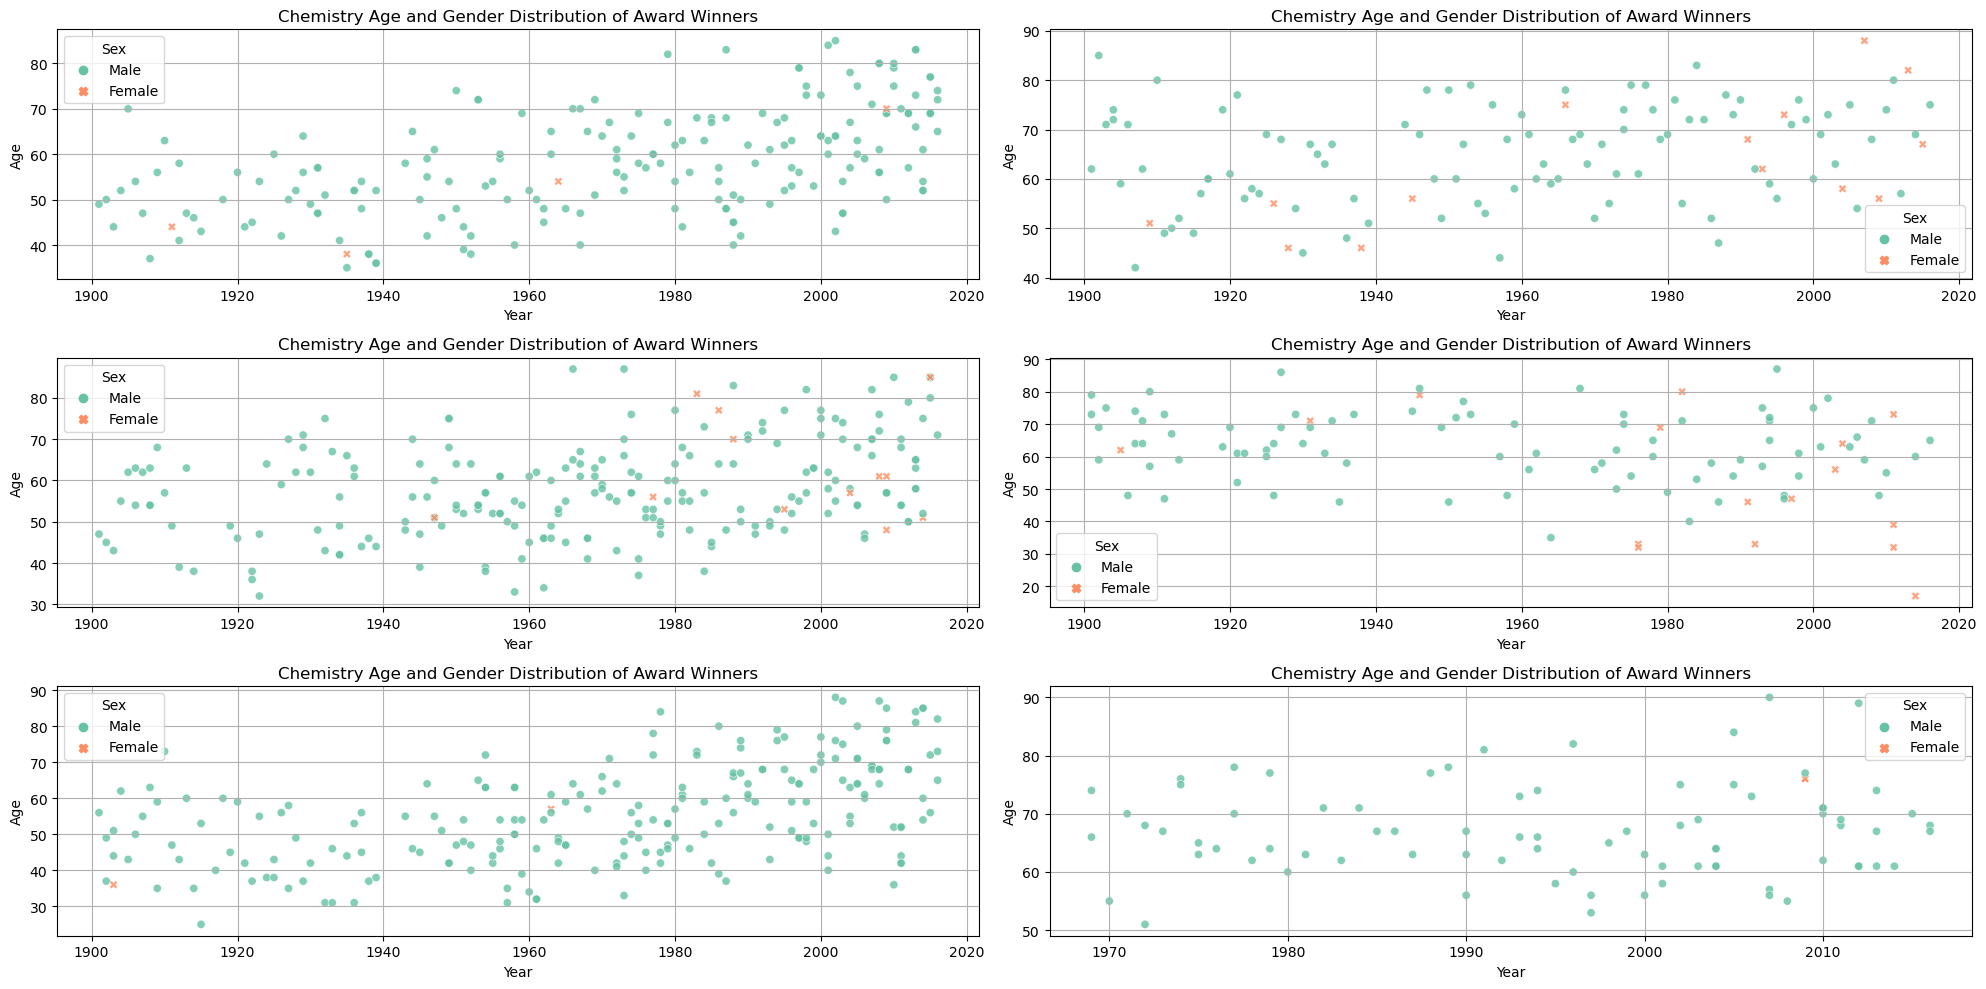

In [235]:
categories = nd_category['Category'].unique()
num_categories = len(categories)

fig, axes = plt.subplots(nrows=(num_categories + 1) // 2, ncols=2, figsize=(20, 10))

axes = axes.flatten()

for ax, Category in zip(axes, categories):
    Category_Data = nd_category[nd_category['Category'] == Category]
    
    sns.scatterplot(data=Category_Data, x='Year', y='Age', hue='Sex', palette='Set2', 
                    style='Sex', alpha=0.8, ax=ax)
    
    ax.set_title(f'{category} Age and Gender Distribution of Award Winners')
    ax.set_xlabel('Year')
    ax.set_ylabel('Age')
    ax.legend(title='Sex')
    ax.grid(True)

for i in range(len(categories), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<span style="font-weight:bold; color:black; font-size:18 px; "> Between 1901 and 2016, when age and gender characteristics of Nobel Prize winners are examined without separating the award categories, the most notable outcome is the clear dominance of male winners across all categories.

Chemistry: The majority of winners are men between 40 and 70 years old. After the 1960s, the age of male winners shifted to 50-70, and after 2000, towards 80. Female winners, on the other hand, appear as isolated cases.

Literature: While the number of female winners is more significant compared to other categories, men still hold the majority. The age range of winners generally falls between 50 and 80, with an increase in female winners after 2000.

Medicine: Female winners increased noticeably after the 1980s. Before that, most winners were aged between 40 and 70, but since the 1980s, the range has shifted to 70+ years, focusing on the 50-80 range in the 2010s.

Peace: Until the 1980s, men dominated this category, but the number of female winners has increased since then. The age range is generally 50-80, with notable exceptions like Malala Yousafzai, who won at the age of 17 in 2014, becoming the youngest Nobel laureate.

Physics: Only two women, Marie Curie in 1903 and Maria Goeppert Mayer in 1963, have won the prize, both of Polish origin. The age range of male winners shifted from 30-60 before the 1960s to 40-70, and then to 50-80 in later decades.

Economics: Awards in this category started in the late 1960s, with men again being the majority of winners. Elinor Ostrom became the first and only female winner in 2009. The typical age range of winners is 60-80.

# 6.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> Visualize and interpret the categories and countries of Nobel Prize winners between 1938-1945.

In [236]:
#The dataframe in 5. question was used.
filtered_years= nd_category[(nd_category['Year'] >= 1938) & (nd_category['Year'] <= 1945)]
display(filtered_years)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
202,1938,Chemistry,The Nobel Prize in Chemistry 1938,"""for his work on carotenoids and vitamins""",1/1,198,Individual,Richard Kuhn,1900-12-03,Vienna,Austria-Hungary (Austria),Male,Kaiser-Wilhelm-Institut (now Max-Planck Instit...,Heidelberg,Germany,1967-07-31,Heidelberg,West Germany (Germany),38.0
203,1938,Chemistry,The Nobel Prize in Chemistry 1938,"""for his work on carotenoids and vitamins""",1/1,198,Individual,Richard Kuhn,1900-12-03,Vienna,Austria-Hungary (Austria),Male,University of Heidelberg,Heidelberg,Germany,1967-07-31,Heidelberg,West Germany (Germany),38.0
204,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,Female,NaN,NaN,NaN,1973-03-06,"Danby, VT",United States of America,46.0
205,1938,Medicine,The Nobel Prize in Physiology or Medicine 1938,"""for the discovery of the role played by the s...",1/1,333,Individual,Corneille Jean François Heymans,1892-03-28,Ghent,Belgium,Male,Ghent University,Ghent,Belgium,1968-07-18,Knokke,Belgium,46.0
207,1938,Physics,The Nobel Prize in Physics 1938,"""for his demonstrations of the existence of ne...",1/1,46,Individual,Enrico Fermi,1901-09-29,Rome,Italy,Male,Rome University,Rome,Italy,1954-11-28,"Chicago, IL",United States of America,37.0
208,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin-Dahlem,Germany,1995-01-18,Munich,Germany,36.0
209,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Berlin University,Berlin,Germany,1995-01-18,Munich,Germany,36.0
210,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on polymethylenes and higher ter...",1/2,200,Individual,Leopold Ruzicka,1887-09-13,Vukovar,Austria-Hungary (Croatia),Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,1976-09-26,Zurich,Switzerland,52.0
211,1939,Literature,The Nobel Prize in Literature 1939,"""for his deep understanding of his country's p...",1/1,613,Individual,Frans Eemil Sillanpää,1888-09-16,Hämeenkyrö,Russian Empire (Finland),Male,NaN,NaN,NaN,1964-06-03,Helsinki,Finland,51.0
212,1939,Medicine,The Nobel Prize in Physiology or Medicine 1939,"""for the discovery of the antibacterial effect...",1/1,334,Individual,Gerhard Domagk,1895-10-30,Lagow,Germany (Poland),Male,Munster University,Munster,Germany,1964-04-24,Burgberg,West Germany (Germany),44.0


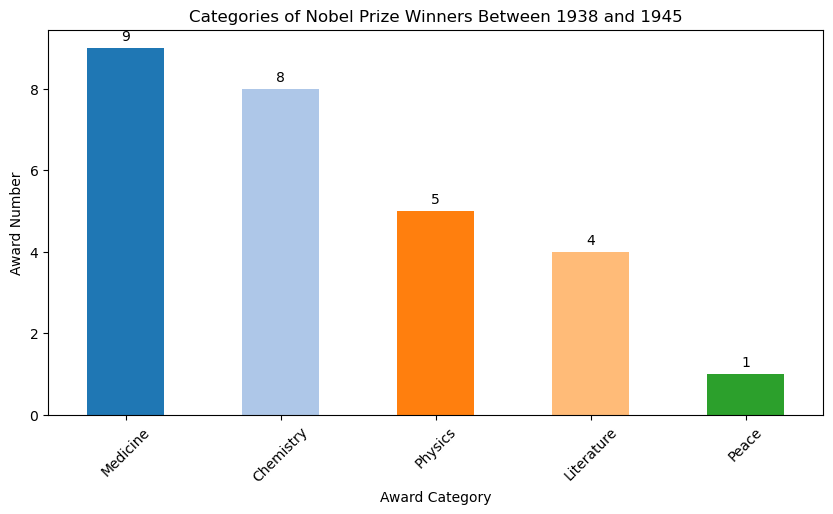

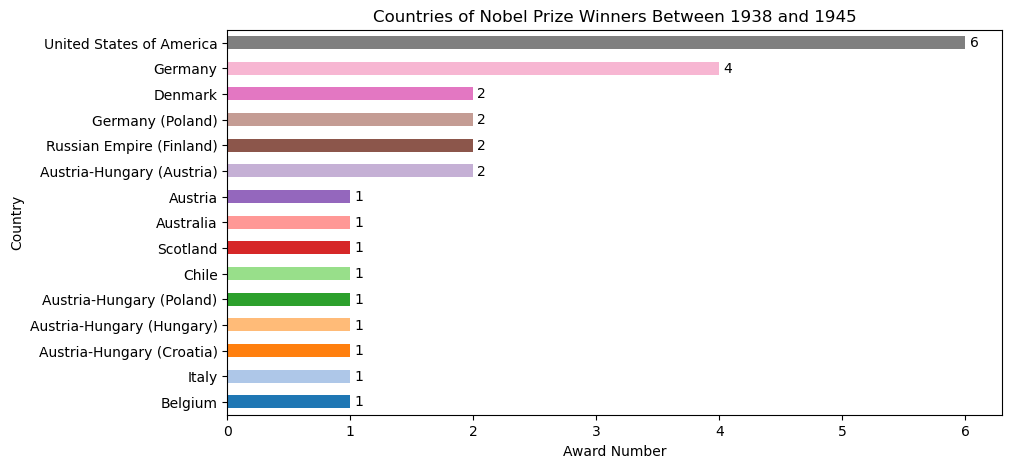

In [237]:
category_counts = filtered_years['Category'].value_counts()

colors = plt.cm.tab20.colors

plt.figure(figsize=(10, 5))
bars = category_counts.plot(kind='bar', color=colors)

for i, bar in enumerate(bars.patches):
    bars.annotate(f'{bar.get_height()}', 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),
                  textcoords="offset points", 
                  ha='center', va='bottom')

plt.title('Categories of Nobel Prize Winners Between 1938 and 1945')
plt.xlabel('Award Category')
plt.ylabel('Award Number')
plt.xticks(rotation=45)
plt.show()

country_counts = filtered_years['Birth Country'].value_counts()
country_counts_sorted = country_counts.sort_values(ascending=True)

colors = plt.cm.tab20.colors  

plt.figure(figsize=(10, 5))
bars = country_counts_sorted.plot(kind='barh', color=colors)

for i, bar in enumerate(bars.patches):
    bars.annotate(f'{bar.get_width()}', 
                  xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                  xytext=(3, 0),
                  textcoords="offset points", 
                  ha='left', va='center')

plt.title('Countries of Nobel Prize Winners Between 1938 and 1945')
plt.xlabel('Award Number')
plt.ylabel('Country')
plt.show()

<span style="font-weight:bold; color:black; font-size:18 px; "> The period between 1938 and 1945 covers the Nobel Prizes awarded during World War II. 
    
Nobel Prizes during World War II (1938-1945):

Most awards were in medicine, chemistry, and physics, reflecting the wartime focus on scientific advancements.
Medical, chemical, and physical experiments during the war raised ethical concerns but led to major breakthroughs.
Peace efforts were minimal, with Cordell Hull (USA) being the only Peace Prize recipient, for his role in founding the UN.

Winners' Birth Countries:

Primarily from the USA, Germany, and Russia, reflecting the power dynamics of the time.
Only one non-Western laureate, from Chile, indicating a Western-centric distribution of awards.
Given the dominant power dynamics of the time, it is understandable that the awards were largely shared among these Western nations.

# 7.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> Visualize and interpret the categories and countries of Nobel Prize winners between 1947-1991. (A separate graphic is required for each category)

In [238]:
#The dataframe in 5.question was used.
filtered_years_2= nd_category[(nd_category['Year'] >= 1947) & (nd_category['Year'] <= 1991)]
display(filtered_years)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
202,1938,Chemistry,The Nobel Prize in Chemistry 1938,"""for his work on carotenoids and vitamins""",1/1,198,Individual,Richard Kuhn,1900-12-03,Vienna,Austria-Hungary (Austria),Male,Kaiser-Wilhelm-Institut (now Max-Planck Instit...,Heidelberg,Germany,1967-07-31,Heidelberg,West Germany (Germany),38.0
203,1938,Chemistry,The Nobel Prize in Chemistry 1938,"""for his work on carotenoids and vitamins""",1/1,198,Individual,Richard Kuhn,1900-12-03,Vienna,Austria-Hungary (Austria),Male,University of Heidelberg,Heidelberg,Germany,1967-07-31,Heidelberg,West Germany (Germany),38.0
204,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,Female,NaN,NaN,NaN,1973-03-06,"Danby, VT",United States of America,46.0
205,1938,Medicine,The Nobel Prize in Physiology or Medicine 1938,"""for the discovery of the role played by the s...",1/1,333,Individual,Corneille Jean François Heymans,1892-03-28,Ghent,Belgium,Male,Ghent University,Ghent,Belgium,1968-07-18,Knokke,Belgium,46.0
207,1938,Physics,The Nobel Prize in Physics 1938,"""for his demonstrations of the existence of ne...",1/1,46,Individual,Enrico Fermi,1901-09-29,Rome,Italy,Male,Rome University,Rome,Italy,1954-11-28,"Chicago, IL",United States of America,37.0
208,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin-Dahlem,Germany,1995-01-18,Munich,Germany,36.0
209,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,Germany,Male,Berlin University,Berlin,Germany,1995-01-18,Munich,Germany,36.0
210,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on polymethylenes and higher ter...",1/2,200,Individual,Leopold Ruzicka,1887-09-13,Vukovar,Austria-Hungary (Croatia),Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,1976-09-26,Zurich,Switzerland,52.0
211,1939,Literature,The Nobel Prize in Literature 1939,"""for his deep understanding of his country's p...",1/1,613,Individual,Frans Eemil Sillanpää,1888-09-16,Hämeenkyrö,Russian Empire (Finland),Male,NaN,NaN,NaN,1964-06-03,Helsinki,Finland,51.0
212,1939,Medicine,The Nobel Prize in Physiology or Medicine 1939,"""for the discovery of the antibacterial effect...",1/1,334,Individual,Gerhard Domagk,1895-10-30,Lagow,Germany (Poland),Male,Munster University,Munster,Germany,1964-04-24,Burgberg,West Germany (Germany),44.0


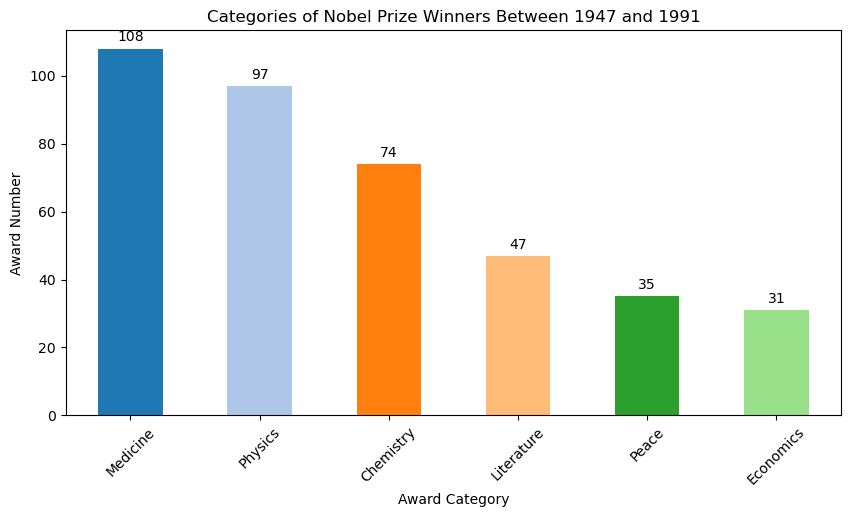

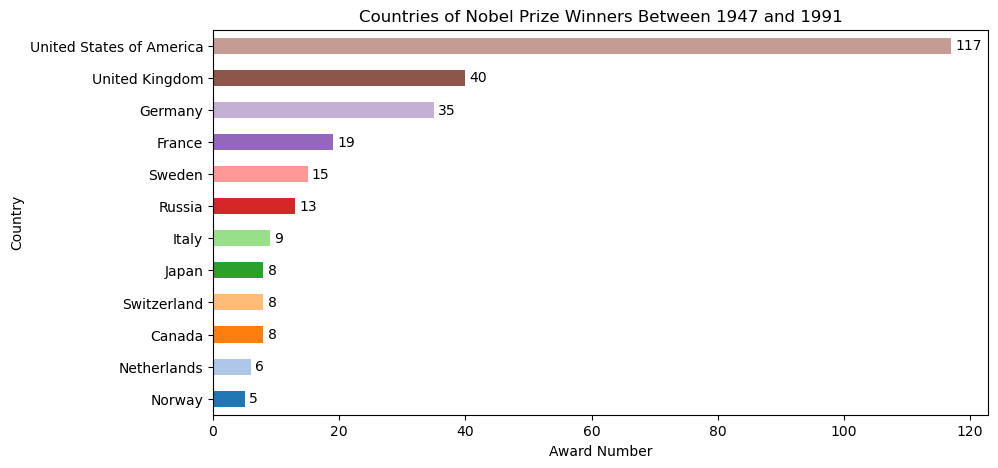

In [239]:
category_counts = filtered_years_2['Category'].value_counts()

colors = plt.cm.tab20.colors

plt.figure(figsize=(10, 5))
bars = category_counts.plot(kind='bar', color=colors)

for i, bar in enumerate(bars.patches):
    bars.annotate(f'{bar.get_height()}', 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),
                  textcoords="offset points", 
                  ha='center', va='bottom')

plt.title('Categories of Nobel Prize Winners Between 1947 and 1991')
plt.xlabel('Award Category')
plt.ylabel('Award Number')
plt.xticks(rotation=45)
plt.show()


country_counts = filtered_years_2['Birth Country'].value_counts()
country_counts_sorted = country_counts[country_counts >= 5].sort_values(ascending=True)


colors = plt.cm.tab20.colors  

plt.figure(figsize=(10, 5))
bars = country_counts_sorted.plot(kind='barh', color=colors)

for i, bar in enumerate(bars.patches):
    bars.annotate(f'{bar.get_width()}', 
                  xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                  xytext=(3, 0),
                  textcoords="offset points", 
                  ha='left', va='center')

plt.title('Countries of Nobel Prize Winners Between 1947 and 1991')
plt.xlabel('Award Number')
plt.ylabel('Country')
plt.show()

<span style="font-weight:bold; color:black; font-size:18 px; "> When looking at the period between 1947 and 1991, it is much more productive to evaluate it considering the Cold War and the developments in the bipolar world. 

Cold War Context (1947-1991):

Nobel Prizes in medicine, physics, and chemistry reflected global defense and threat efforts, especially due to chemical warfare risks.
Major powers like the USA, UK, Germany, France, and Russia dominated the prize lists, aligning with the period's power dynamics.
    
Northern European & Global Visibility:

Northern European countries (Sweden, Switzerland, Norway) became more visible in Nobel Prizes.
Canada, as a country of immigrants, began to win awards during this period.
Japan emerged as a new force in Nobel prizes, reflecting its rise as a global power.

# 8.QUESTION 
<span style="font-weight:bold; color:black; font-size:18 px; "> Visualize the countries and ages of winners in the categories of Chemistry, Literature, Peace, Physics and Medicine after 2000. (A separate visualization is required for each category) Interpret the data.

In [240]:
#The dataframe in 5. question was used.
filtered_years_3 = nd_category[nd_category['Year'] >= 2000]
filtered_years_3_sorted = filtered_years_3.sort_values(by ='Age')
display(filtered_years_3_sorted)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaT,NaN,NaN,17.0
893,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,871,Individual,Tawakkol Karman,1979-02-07,Ta'izz,Yemen,Female,NaN,NaN,NaN,NaT,NaN,NaN,32.0
882,2010,Physics,The Nobel Prize in Physics 2010,"""for groundbreaking experiments regarding the ...",1/2,850,Individual,Konstantin Novoselov,1974-08-23,Nizhny Tagil,Russia,Male,University of Manchester,Manchester,United Kingdom,NaT,NaN,NaN,36.0
892,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,870,Individual,Leymah Gbowee,1972-02-01,Monrovia,Liberia,Female,NaN,NaN,NaN,NaT,NaN,NaN,39.0
756,2001,Physics,The Nobel Prize in Physics 2001,"""for the achievement of Bose-Einstein condensa...",1/3,738,Individual,Eric A. Cornell,1961-12-19,"Palo Alto, CA",United States of America,Male,"University of Colorado, JILA","Boulder, CO",United States of America,NaT,NaN,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,88.0
770,2002,Physics,The Nobel Prize in Physics 2002,"""for pioneering contributions to astrophysics,...",1/4,753,Individual,Raymond Davis Jr.,1914-10-14,"Washington, DC",United States of America,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,2006-05-31,"Blue Point, NY",United States of America,88.0
904,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,Male,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America,89.0
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90.0


In [241]:
filtered_years_3_sorted = filtered_years_3.sort_values(by='Age', ascending=False)
display(filtered_years_3_sorted)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90.0
904,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,Male,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America,89.0
828,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,88.0
770,2002,Physics,The Nobel Prize in Physics 2002,"""for pioneering contributions to astrophysics,...",1/4,753,Individual,Raymond Davis Jr.,1914-10-14,"Washington, DC",United States of America,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,2006-05-31,"Blue Point, NY",United States of America,88.0
849,2008,Physics,The Nobel Prize in Physics 2008,"""for the discovery of the mechanism of spontan...",1/2,826,Individual,Yoichiro Nambu,1921-01-18,Tokyo,Japan,Male,"Enrico Fermi Institute, University of Chicago","Chicago, IL",United States of America,2015-07-05,Osaka,Japan,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,870,Individual,Leymah Gbowee,1972-02-01,Monrovia,Liberia,Female,NaN,NaN,NaN,NaT,NaN,NaN,39.0
882,2010,Physics,The Nobel Prize in Physics 2010,"""for groundbreaking experiments regarding the ...",1/2,850,Individual,Konstantin Novoselov,1974-08-23,Nizhny Tagil,Russia,Male,University of Manchester,Manchester,United Kingdom,NaT,NaN,NaN,36.0
893,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,871,Individual,Tawakkol Karman,1979-02-07,Ta'izz,Yemen,Female,NaN,NaN,NaN,NaT,NaN,NaN,32.0
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaT,NaN,NaN,17.0


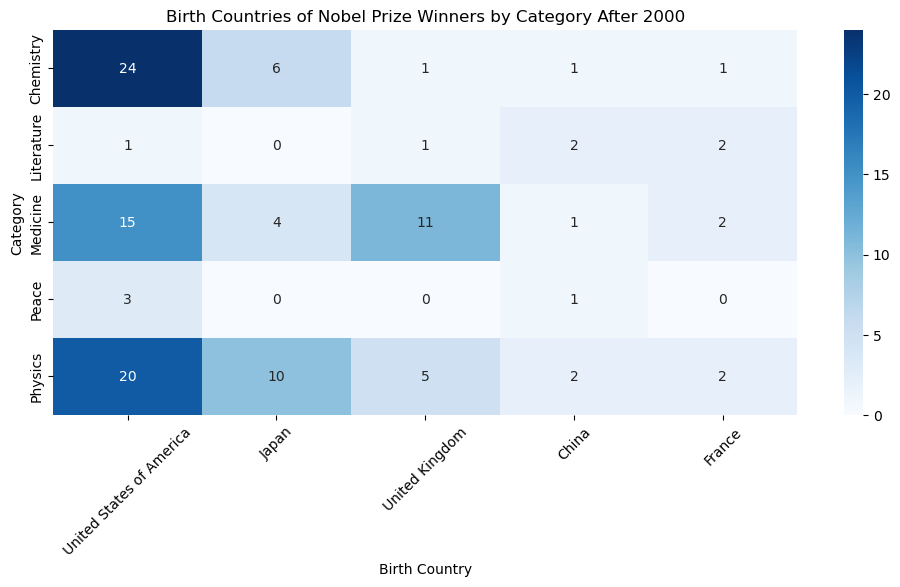

In [242]:
selected_categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
filtered_categories = nd_category[(nd_category['Year'] >= 2000) & (nd_category['Category'].isin(selected_categories))]

country_counts_by_category = filtered_categories.groupby(['Category', 'Birth Country']).size().unstack(fill_value=0)

top_countries = country_counts_by_category.sum().nlargest(5).index  

filtered_country_counts = country_counts_by_category[top_countries]

plt.figure(figsize=(12, 5))
sns.heatmap(filtered_country_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Birth Countries of Nobel Prize Winners by Category After 2000')
plt.xlabel('Birth Country')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

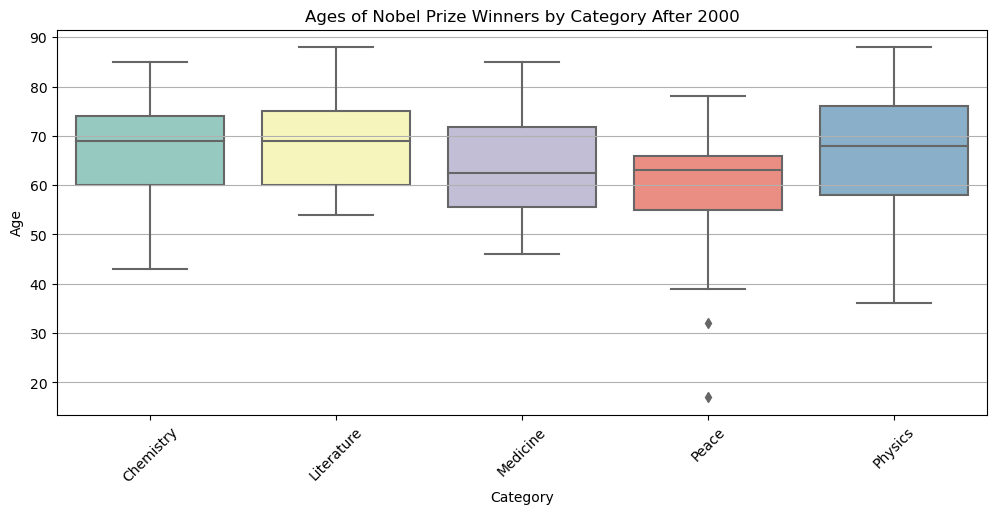

In [243]:
selected_categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
filtered_categories = filtered_years_3[filtered_years_3['Category'].isin(selected_categories)]

plt.figure(figsize=(12, 5))
sns.boxplot(x='Category', y='Age', data=filtered_categories, palette='Set3')
plt.title('Ages of Nobel Prize Winners by Category After 2000')
plt.xlabel('Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<span style="font-weight:bold; color:black; font-size:18 px; "> Analyzing Nobel Prize Winners After 2000 Based on Their Birth Countries:
    
Far Eastern countries like Japan and China have started to gain prominent positions. 
Japan has achieved significant success, especially in Physics and Chemistry.
The USA maintains its dominant position, particularly in Chemistry, Medicine, and Physics.
The UK has maintained some of its success, while Germany and France, although still ranking high, have seen a decline in their award numbers compared to earlier periods.

Age Distribution of Prize Winners:

The majority of winners across all categories are in the 60-70 age range. 
Chemistry and Medicine winners tend to be in their mid-60s.
Physics and Literature winners are closer to 70 years old.
The Peace category has more exceptions compared to other fields.

Notable Exceptions in the Peace Category:
    
Winners are mostly under 60 years old.

Two extraordinary exceptions:
    
32-year-old Tawakkol Karman from Yemen.
17-year-old Malala Yousafzai from Pakistan, the youngest prize winner.
Both women can be considered as breaking the Western-centric perspective of Nobel Prizes with their Muslim identities, resistance to oppression, and roles as women's rights activists.